In [183]:
import requests
import pandas as pd
from api_keys import IEX_api

In [184]:
ticker = 'AAPL'
period = 'annual'
last = '30'

In [185]:
#fundamentals
strategy = 'fundamentals'
url = f'https://api.iex.cloud/v1/data/core/{strategy}/{ticker}/{period}?last={last}&token={IEX_api}'
response = requests.get(url)
fundamentals = response.json()
response

<Response [200]>

In [186]:
income_statement[0].keys()
balance_sheet[0].keys()
cash_flow[0].keys()
fundamentals[0].keys()

dict_keys(['accountsPayable', 'accountsPayableTurnover', 'accountsReceivable', 'accountsReceivableTurnover', 'asOfDate', 'assetsCurrentCash', 'assetsCurrentCashRestricted', 'assetsCurrentDeferredCompensation', 'assetsCurrentDeferredTax', 'assetsCurrentDiscontinuedOperations', 'assetsCurrentInvestments', 'assetsCurrentLeasesOperating', 'assetsCurrentLoansNet', 'assetsCurrentOther', 'assetsCurrentSeparateAccounts', 'assetsCurrentUnadjusted', 'assetsFixed', 'assetsFixedDeferredCompensation', 'assetsFixedDeferredTax', 'assetsFixedDiscontinuedOperations', 'assetsFixedLeasesOperating', 'assetsFixedOperatingDiscontinuedOperations', 'assetsFixedOperatingSubsidiaryUnconsolidated', 'assetsFixedOreo', 'assetsFixedOther', 'assetsFixedUnconsolidated', 'assetsUnadjusted', 'capex', 'capexAcquisition', 'capexMaintenance', 'cashConversionCycle', 'cashFlowFinancing', 'cashFlowInvesting', 'cashFlowOperating', 'cashFlowShareRepurchase', 'cashLongTerm', 'cashOperating', 'cashPaidForIncomeTaxes', 'cashPaidF

In [189]:
opcash_to_capex = pd.DataFrame({
    'date':'',
    'Operating cash flow': '',
    'ticker': ticker,
    'capex': ''
}, index = range(len(fundamentals)))
for i in range(len(fundamentals)):
    opcash_to_capex.iloc[i]['date'] = fundamentals[i]['date']
    opcash_to_capex.loc[i, 'Operating cash flow'] = fundamentals[i]['cashFlowOperating']
    opcash_to_capex.loc[i, 'capex'] = fundamentals[i]['capex']
    # print(fundamentals[i]['date'], fundamentals[i]['cashFlowOperating'], fundamentals[i]['capex'])

opcash_to_capex['date'] = pd.to_datetime(opcash_to_capex['date'], unit = 'ms').dt.year
opcash_to_capex['Operating cash flow to capex'] =abs(opcash_to_capex['capex']/opcash_to_capex['Operating cash flow'] * 100)
opcash_to_capex.set_index('date')

,Operating cash flow,ticker,capex,Operating cash flow to capex
date,,,,
2023,110543000000,AAPL,-10959000000,9.913789
2022,122151000000,AAPL,-10708000000,8.766199
2021,104038000000,AAPL,-11085000000,10.654761
2020,80674000000,AAPL,-7309000000,9.05992
2019,69391000000,AAPL,-10495000000,15.12444
2018,77434000000,AAPL,-13313000000,17.192706
2017,63598000000,AAPL,-12795000000,20.118557
2016,65824000000,AAPL,-13548000000,20.582158
2015,81266000000,AAPL,-11247000000,13.839736


<Axes: xlabel='date'>

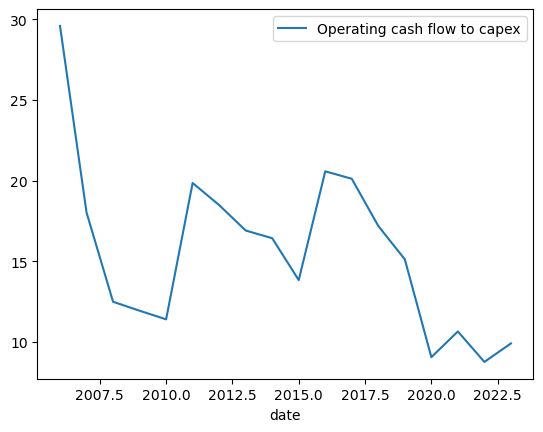

In [190]:
opcash_to_capex = opcash_to_capex[~(opcash_to_capex['capex'] == 0)]
opcash_to_capex.plot(x = 'date', y = 'Operating cash flow to capex')